In [1]:
import argparse
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import torch
import numpy as np 

from preprocess import get_mnist, get_webcam
from train import TrainerVaDE

In [2]:
class Args:
    batch_size = 128
    lr = 1e-5
    dataset = 'webcam'
    pretrained_path = 'weights/pretrained_parameter.pth'
    patience = 50
    pretrain = True
    epochs = 200
    n_shots = 3
    sup_mul = 0.9
    pretrain = False


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    
args = Args() # Parsing all the arguments for the training
if args.dataset == 'mnist':
    dataloader_sup,  dataloader_unsup = get_mnist(args)
    n_classes = 10
else:
    dataloader_sup,  dataloader_unsup = get_webcam(args)
    n_classes = 31

In [3]:
vade = TrainerVaDE(args, device, dataloader_sup, dataloader_unsup, n_classes)

In [4]:
if args.dataset == 'webcam':
    classes = ['back_pack',
                'bike',
                'bike_helmet',
                'bookcase',
                'bottle',
                'calculator',
                'desk_chair',
                'desk_lamp',
                'desktop_computer',
                'file_cabinet',
                'headphones',
                'keyboard',
                'laptop_computer',
                'letter_tray',
                'mobile_phone',
                'monitor',
                'mouse',
                'mug',
                'paper_notebook',
                'pen',
                'phone',
                'printer',
                'projector',
                'punchers',
                'ring_binder',
                'ruler',
                'scissors',
                'speaker',
                'stapler',
                'tape_dispenser',
                'trash_can']
else:
    classes = ['0',
               '1',
               '2',
               '3',
               '4',
               '5',
               '6',
               '7',
               '8',
               '9']


def get_latent_space(dataloader, z_dim, model, device, ftr_ext=None):
    z = torch.zeros((1, z_dim)).float().to(device)
    y = torch.zeros((1)).long().to(device)
    with torch.no_grad():
        for img, label in dataloader:
            img, label = img.to(device).float(), label.to(device).long()
            if ftr_ext is not None:
                img = ftr_ext(img); img = img.detach()

            mu, log_var = model.encode(img)
            z_l = model.reparameterize(mu, log_var)
            y = torch.cat((y, label), dim=0)
            z = torch.cat((z, z_l), dim=0)
    return z[1:], y[1:]


def plot_tsne(X_embedded, y, ticks):
    f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(15,5))

    cmap = plt.get_cmap('jet', 31)


    cax = ax1.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y.numpy(),
                      s=15, cmap=cmap)

    cbar = f.colorbar(cax, ticks=np.linspace(0,30,31))
    cbar.ax.set_yticklabels(ticks)

    ax1.xaxis.set_visible(False)
    ax1.yaxis.set_visible(False)

    plt.show()

In [5]:
vade.train()

Training VaDE...


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Training VaDE... Epoch: 0, Loss: 13.587240099906921, Acc: 4.301075268817205
Testing VaDE... Epoch: 0, Loss: 13.265417575836182, Acc: 3.8504111321948136
Training VaDE... Epoch: 1, Loss: 12.065616369247437, Acc: 2.1505376344086025
Testing VaDE... Epoch: 1, Loss: 12.868736028671265, Acc: 2.933270082226439
Training VaDE... Epoch: 2, Loss: 11.45186984539032, Acc: 4.301075268817205
Testing VaDE... Epoch: 2, Loss: 12.5393967628479, Acc: 3.4471853257432006
Training VaDE... Epoch: 3, Loss: 10.710984587669373, Acc: 3.225806451612903
Testing VaDE... Epoch: 3, Loss: 12.29144299030304, Acc: 4.253636938646427
Training VaDE... Epoch: 4, Loss: 10.118194222450256, Acc: 4.301075268817205
Testing VaDE... Epoch: 4, Loss: 12.18341076374054, Acc: 5.392156862745098
Training VaDE... Epoch: 5, Loss: 9.708140850067139, Acc: 4.301075268817205
Testing VaDE... Epoch: 5, Loss: 12.183349013328552, Acc: 4.791271347248577
Training VaDE... Epoch: 6, Loss: 9.22628653049469, Acc: 7.526881720430108
Testing VaDE... Epoch: 

Training VaDE... Epoch: 54, Loss: 2.8913210928440094, Acc: 48.38709677419355
Testing VaDE... Epoch: 54, Loss: 10.32983684539795, Acc: 6.222327640733712
Training VaDE... Epoch: 55, Loss: 2.862759530544281, Acc: 52.68817204301075
Testing VaDE... Epoch: 55, Loss: 10.15341567993164, Acc: 7.922201138519924
Training VaDE... Epoch: 56, Loss: 2.8503812849521637, Acc: 51.61290322580645
Testing VaDE... Epoch: 56, Loss: 10.28568971157074, Acc: 7.297596457938014
Training VaDE... Epoch: 57, Loss: 2.7955237329006195, Acc: 50.53763440860215
Testing VaDE... Epoch: 57, Loss: 10.368130087852478, Acc: 8.863061353573688
Training VaDE... Epoch: 58, Loss: 2.7736257016658783, Acc: 63.44086021505376
Testing VaDE... Epoch: 58, Loss: 10.52420449256897, Acc: 7.0050600885515495
Training VaDE... Epoch: 59, Loss: 2.7313250601291656, Acc: 61.29032258064516
Testing VaDE... Epoch: 59, Loss: 10.246872782707214, Acc: 6.7362428842504745
Training VaDE... Epoch: 60, Loss: 2.684139132499695, Acc: 58.06451612903226
Testing V

Training VaDE... Epoch: 108, Loss: 2.1483848989009857, Acc: 60.215053763440864
Testing VaDE... Epoch: 108, Loss: 10.489977240562439, Acc: 9.511385199240987
Training VaDE... Epoch: 109, Loss: 2.1172253489494324, Acc: 68.81720430107528
Testing VaDE... Epoch: 109, Loss: 10.421484231948853, Acc: 7.945920303605313
Training VaDE... Epoch: 110, Loss: 2.0954625010490417, Acc: 64.51612903225806
Testing VaDE... Epoch: 110, Loss: 10.124727368354797, Acc: 7.297596457938013
Training VaDE... Epoch: 111, Loss: 2.0432849526405334, Acc: 60.215053763440864
Testing VaDE... Epoch: 111, Loss: 10.400293946266174, Acc: 7.186907020872865
Training VaDE... Epoch: 112, Loss: 2.0989872217178345, Acc: 73.11827956989248
Testing VaDE... Epoch: 112, Loss: 10.406002759933472, Acc: 7.39247311827957
Training VaDE... Epoch: 113, Loss: 2.113260716199875, Acc: 68.81720430107528
Testing VaDE... Epoch: 113, Loss: 10.371186017990112, Acc: 8.704933586337761
Training VaDE... Epoch: 114, Loss: 2.091955780982971, Acc: 61.29032258

Testing VaDE... Epoch: 161, Loss: 10.797093152999878, Acc: 7.724541429475016
Training VaDE... Epoch: 162, Loss: 1.9008273482322693, Acc: 78.49462365591397
Testing VaDE... Epoch: 162, Loss: 10.56754457950592, Acc: 8.64168247944339
Training VaDE... Epoch: 163, Loss: 1.8595542311668396, Acc: 67.74193548387096
Testing VaDE... Epoch: 163, Loss: 10.503313660621643, Acc: 6.783681214421253
Training VaDE... Epoch: 164, Loss: 1.8650057315826416, Acc: 65.59139784946237
Testing VaDE... Epoch: 164, Loss: 10.426037192344666, Acc: 7.273877292852625
Training VaDE... Epoch: 165, Loss: 1.8612278699874878, Acc: 75.26881720430107
Testing VaDE... Epoch: 165, Loss: 10.475058436393738, Acc: 9.511385199240987
Training VaDE... Epoch: 166, Loss: 1.8623313456773758, Acc: 65.59139784946237
Testing VaDE... Epoch: 166, Loss: 10.553950071334839, Acc: 8.056609740670462
Training VaDE... Epoch: 167, Loss: 1.846339851617813, Acc: 75.26881720430107
Testing VaDE... Epoch: 167, Loss: 10.437067985534668, Acc: 8.325426944971

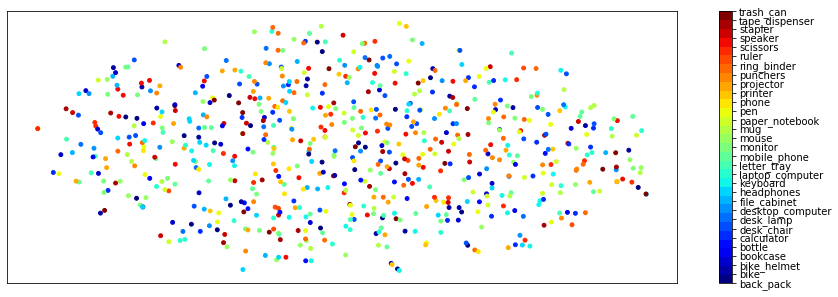

In [7]:
z_dim = 10
ftr_ext = vade.feature_extractor
model = vade.VaDE
z, y = get_latent_space(dataloader_unsup, z_dim, model, device, ftr_ext)
z, y = z.cpu(), y.cpu()
z_embedded = TSNE(n_components=2).fit_transform(z.detach().numpy())
plot_tsne(z_embedded, y, classes)